In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
h_a = np.loadtxt('../../Data/data_39_highSI.txt', dtype=float)

# h_a = h_a * 0.1242
h_a = h_a[h_a>0]
h_a = h_a[1::20]

avr = np.average(h_a)
h_a = h_a/avr
h_a = h_a.reshape(-1,1)

In [5]:
N_train = 3500
N_test = 1000
timesteps = 5

train_data = h_a[:N_train].reshape(-1,1)
test_data = h_a[N_train:(N_train + N_test)].reshape(-1,1)

<function matplotlib.pyplot.show(close=None, block=None)>

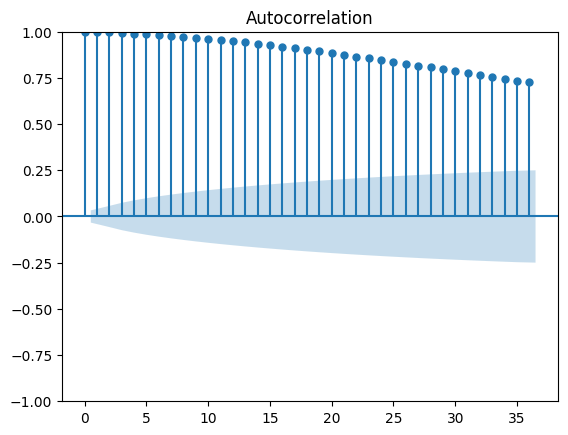

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

# plot_acf(h_a[:N_train+N_test])
plot_acf(train_data)
plt.show

In [14]:
df = pd.DataFrame(h_a[:N_train+N_test], columns=['h_a'])

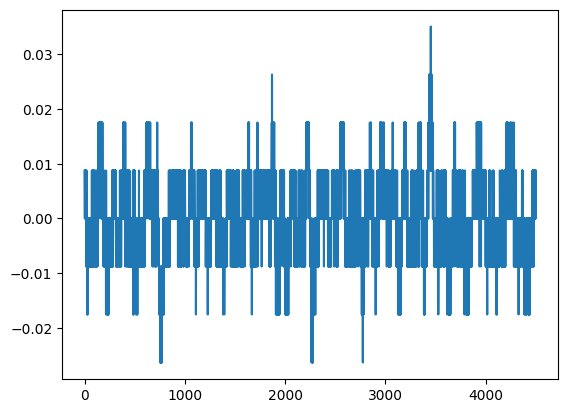

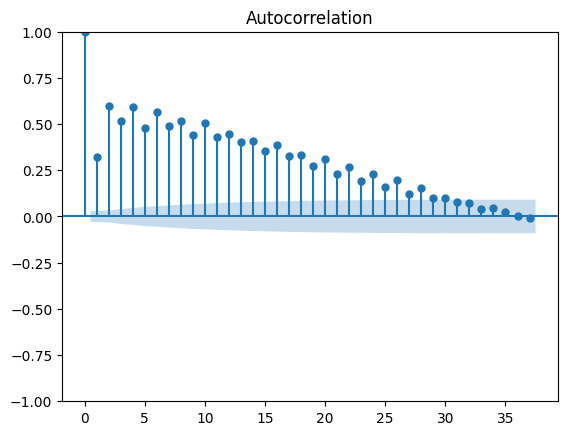

In [17]:
plt.plot(df.h_a.diff())
plot_acf(df.h_a.diff().dropna())
plt.show()

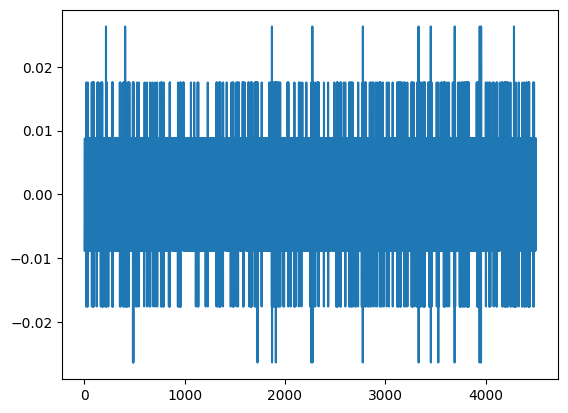

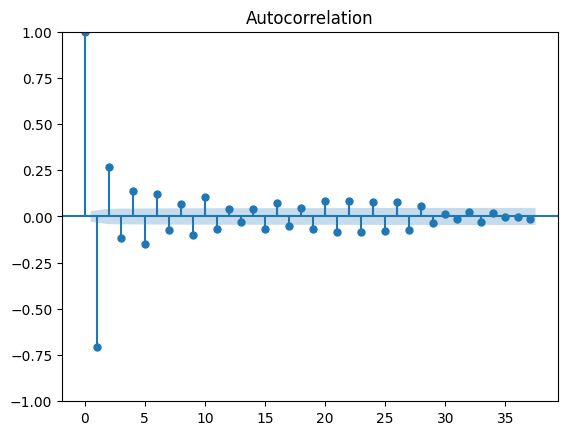

In [18]:
plt.plot(df.h_a.diff().diff())
plot_acf(df.h_a.diff().diff().dropna())
plt.show()

In [23]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.h_a)
print('p_value:', result[1])

result = adfuller(df.h_a.diff().dropna())
print('p_value:', result[1])

result = adfuller(df.h_a.diff().diff().dropna())
print('p_value:', result[1])

p_value: 0.0013803990470222952
p_value: 8.96940911186971e-17
p_value: 9.619063126330619e-26


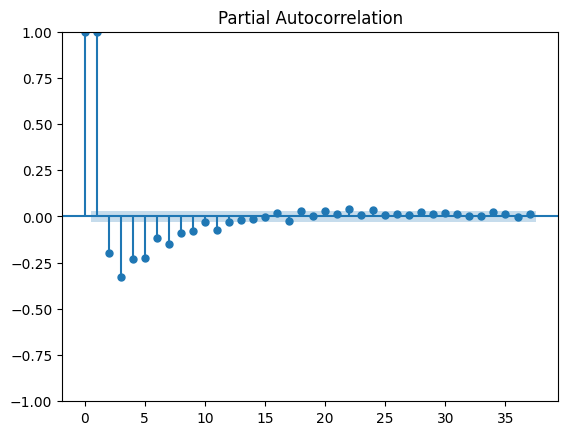

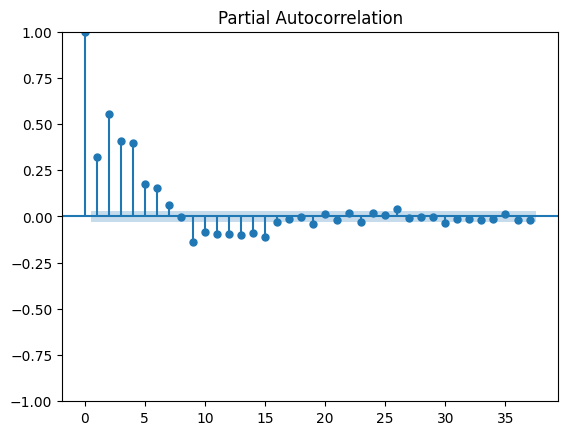

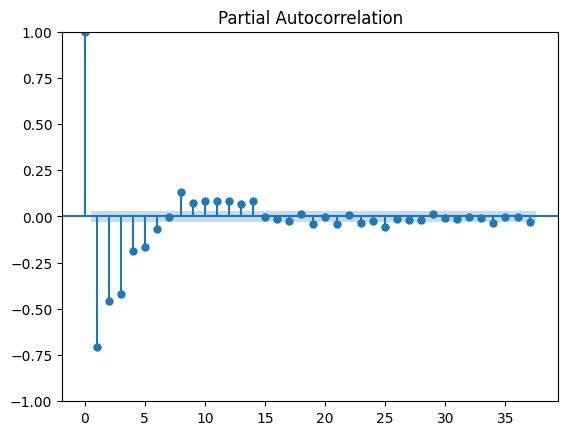

In [25]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df.h_a.dropna())
plot_pacf(df.h_a.diff().dropna())
plot_pacf(df.h_a.diff().diff().dropna())

plt.show()

# Predict
d = 1, p = 1, q = 5

In [52]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(1,1,5))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3500
Model:                 ARIMA(1, 1, 5)   Log Likelihood               13799.498
Date:                Mon, 08 May 2023   AIC                         -27584.996
Time:                        00:14:25   BIC                         -27541.875
Sample:                             0   HQIC                        -27569.606
                               - 3500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9682      0.004    240.443      0.000       0.960       0.976
ma.L1         -1.3539      0.018    -76.729      0.000      -1.388      -1.319
ma.L2          0.6116      0.029     21.104      0.0

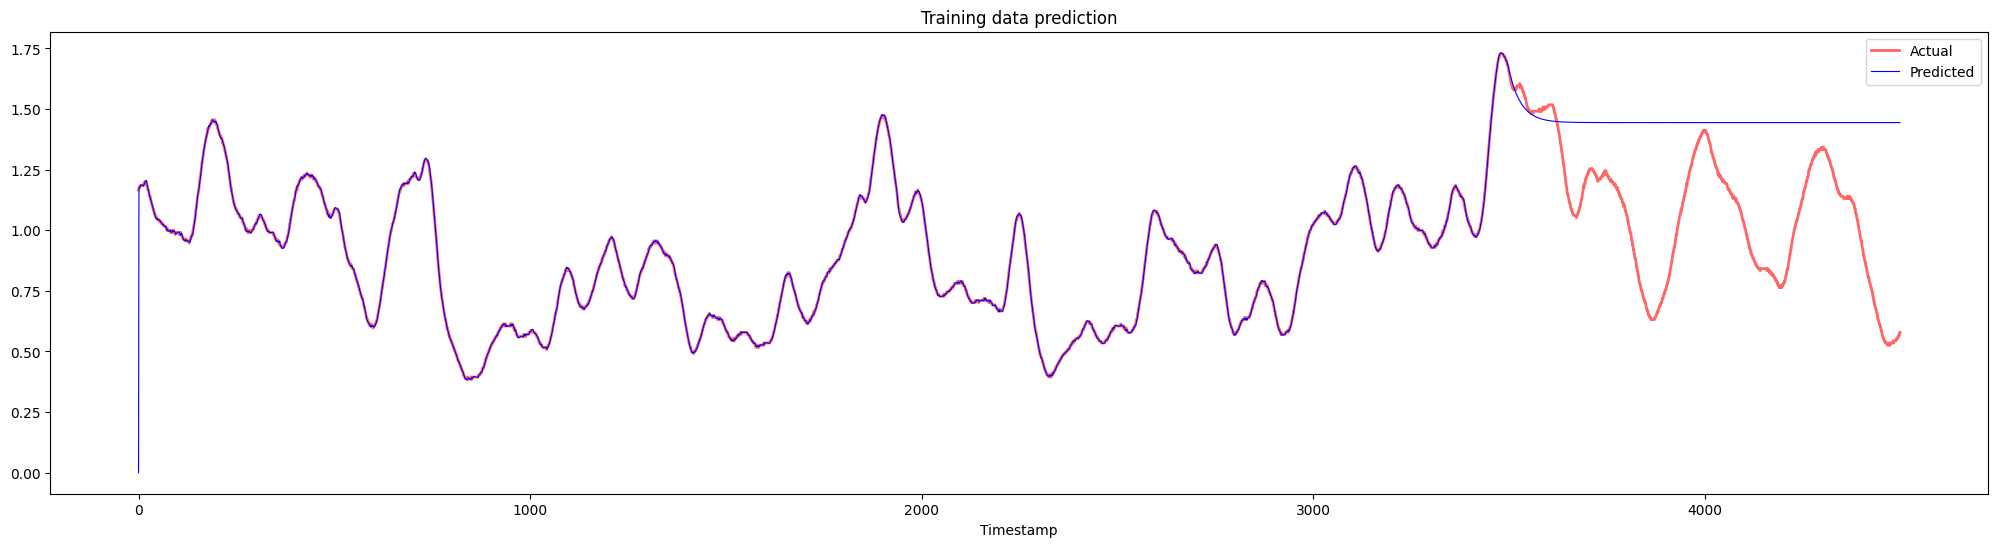

In [60]:
Y_pred = model.predict(start=0,end=len(df)-1)
# Y_pred = model.predict(start=N_train, end=N_train+N_test-1)

plt.figure(figsize=(25,6))
plt.plot(df.h_a, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(Y_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error
import math
print('RMSE: ', math.sqrt(mean_squared_error(df.h_a[1:], Y_pred[1:])))

RMSE:  0.0047155222147371315
